In [3]:
from matplotlib.colors import ListedColormap
from pandas import DataFrame
from sklearn import cross_validation, datasets, metrics, neighbors
from sklearn.model_selection import cross_val_score
import scipy.stats as st
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
import numpy as np
import scipy.optimize as opt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def MSE_func(coordinates, x_arr, y_arr):
    predict_arr = np.array([coordinates[0]*X + coordinates[1] for X in x_arr])
    return np.sum((y_arr - predict_arr) ** 2)

In [5]:
def MAE_func(coordinates, x_arr, y_arr):
    predict_arr = np.array([coordinates[0]*X + coordinates[1] for X in x_arr])
    return np.sum(abs(y_arr - predict_arr))

In [6]:
#Создаем исходную выборку
N = 500
unif_rv = st.uniform(-25, 25)
x = np.array(unif_rv.rvs(N))
eps_rv = st.norm(0, 0.2)
eps = eps_rv.rvs(N)
y = np.array(0.5 * x + 1 + eps)

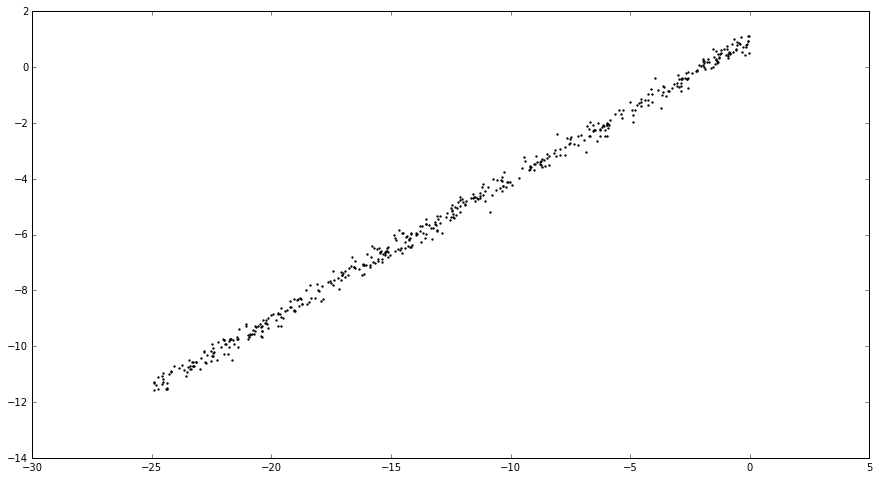

In [7]:
pyplot.figure(figsize = (15, 8))
pyplot.scatter(x, y, marker = '.', s = 7)

In [8]:
#Выделяем обучающую выборку
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(x, 
                                                                                     y, 
                                                                                     test_size = 0.2,
                                                                                     random_state = 1)

In [9]:
#находим с помощью MSE параметры прямой и строим график
result_MSE = opt.minimize(MSE_func, [0, 0], args = (train_data, train_labels))
k = result_MSE.x[0]
b = result_MSE.x[1]
print("MSE", k, b)

('MSE', 0.49888104067398448, 0.97191025565613631)


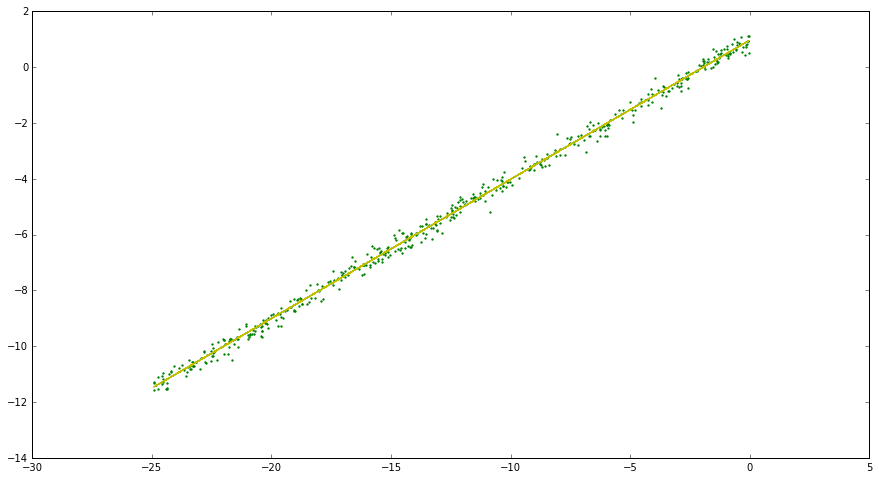

In [10]:
pyplot.figure(figsize = (15, 8))
pyplot.scatter(x, y, marker = '.', s = 7, color = 'g')
pyplot.plot(x, k*x + b, color = 'y')

In [11]:
#Добавляем 75 точек в выборку
N_add = 75
eps_add = eps_rv.rvs(N_add)
eps_new = np.array(list(eps) + list(eps_add))
x_add = unif_rv.rvs(N_add)
x_new = np.array(list(x) + list(x_add))
y_add = -1 + eps_add
y_new = np.array(list(y) + list(y_add))

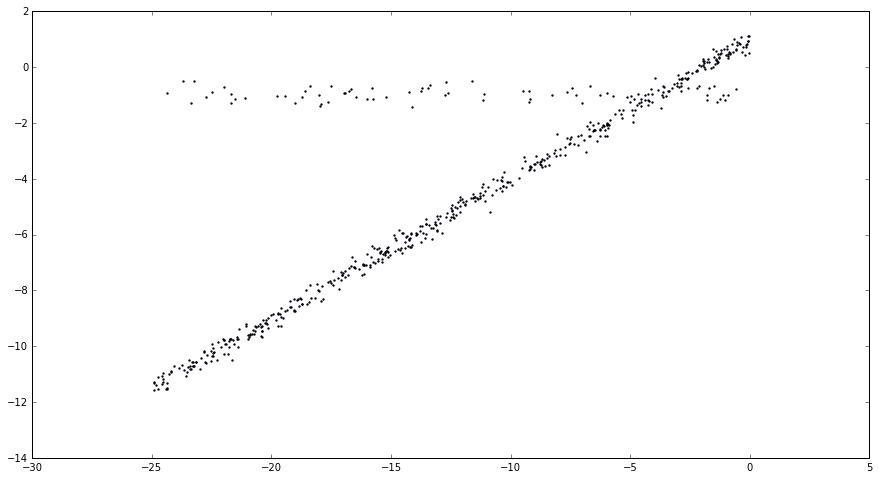

In [12]:
pyplot.figure(figsize = (15, 8))
pyplot.scatter(x_new, y_new, marker = '.', s = 7)

In [14]:
#Снова выделяем обучающую выборку
train_data_n, test_data_n, train_labels_n, test_labels_n = cross_validation.train_test_split(x_new, 
                                                                                     y_new, 
                                                                                     test_size = 0.2,
                                                                                     random_state = 1)

In [15]:
#Находим значения параметров прямых для MSE и MAE
new_MSE_res = opt.minimize(MSE_func, [0,0], args = (train_data_n, train_labels_n))
k_MSE = new_MSE_res.x[0]
b_MSE = new_MSE_res.x[1]
MAE_res = opt.minimize(MAE_func, [0, 0], args  = (train_data_n, train_labels_n))
k_MAE = MAE_res.x[0]
b_MAE = MAE_res.x[1]
print("MSE", k_MSE, b_MSE)
print("MAE", k_MAE, b_MAE)

('MSE', 0.44308675299571504, 0.75203902933174593)
('MAE', 0.49603574574102216, 0.96555126980977779)


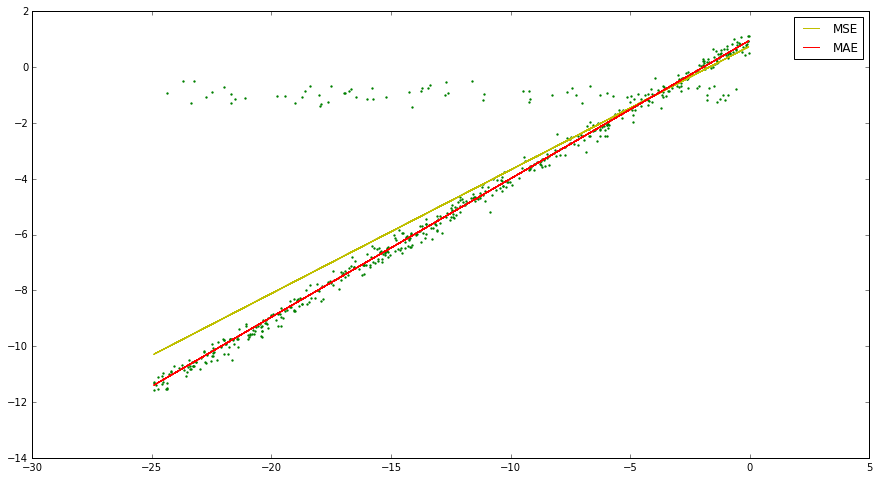

In [16]:
pyplot.figure(figsize = (15, 8))
pyplot.scatter(x_new, y_new, marker = '.', s = 7, color = 'g')
pyplot.plot(x_new, k_MSE * x_new + b_MSE, color = 'y')
pyplot.plot(x_new, k_MAE * x_new + b_MAE, color = 'r')
pyplot.legend(['MSE', 'MAE'], loc = 0)

Из последнего графика делаем вывод, что модели, оптимизирующие MAE устойчивее к выбросам, нежели MSE